#**daimonds project**

firstly 
get data

In [7]:
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


In [8]:
dim=pd.read_csv('diamonds.csv')
dim.drop('Unnamed: 0',axis=1, inplace=True)
dim.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
dim

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
dim.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
dim.isna().sum() # check for missing values in data.

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#**Matplotlib**

1-histogram

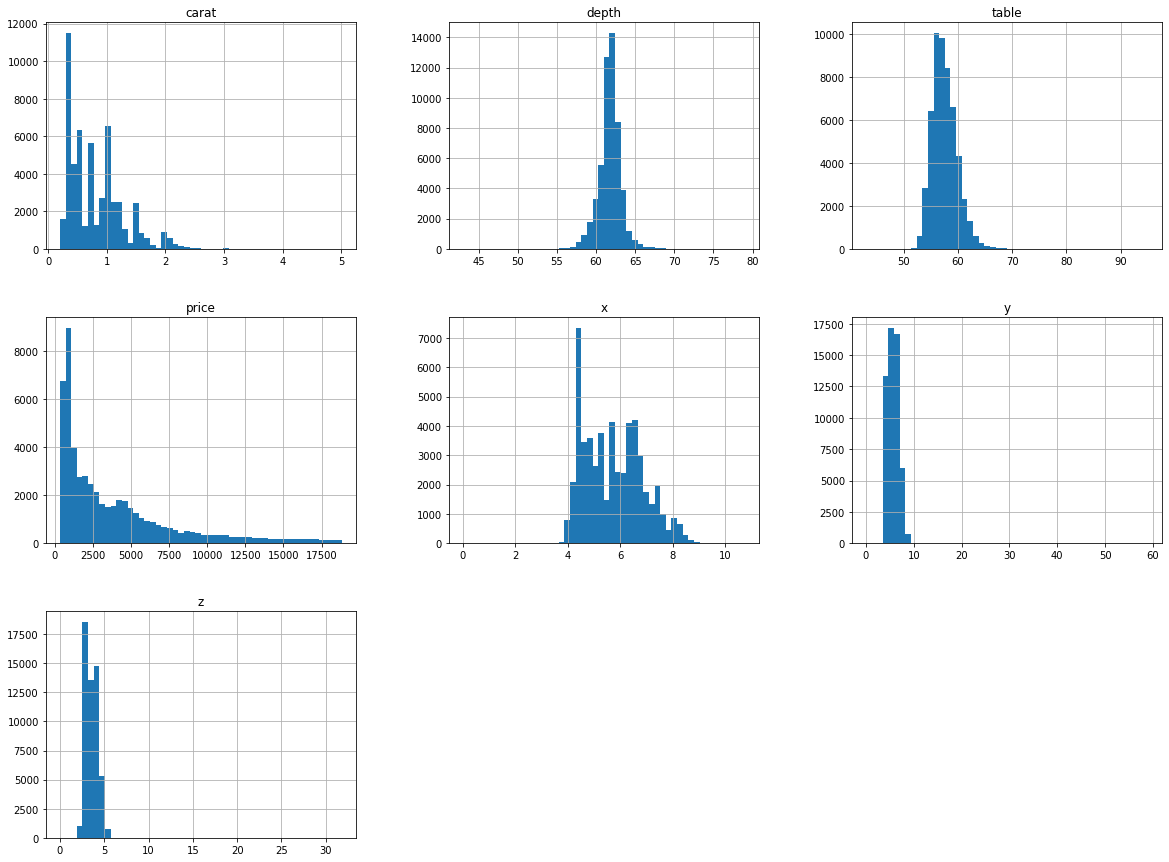

In [ ]:
dim.hist(bins=50, figsize=(20,15))
plt.show()

2-pair plot

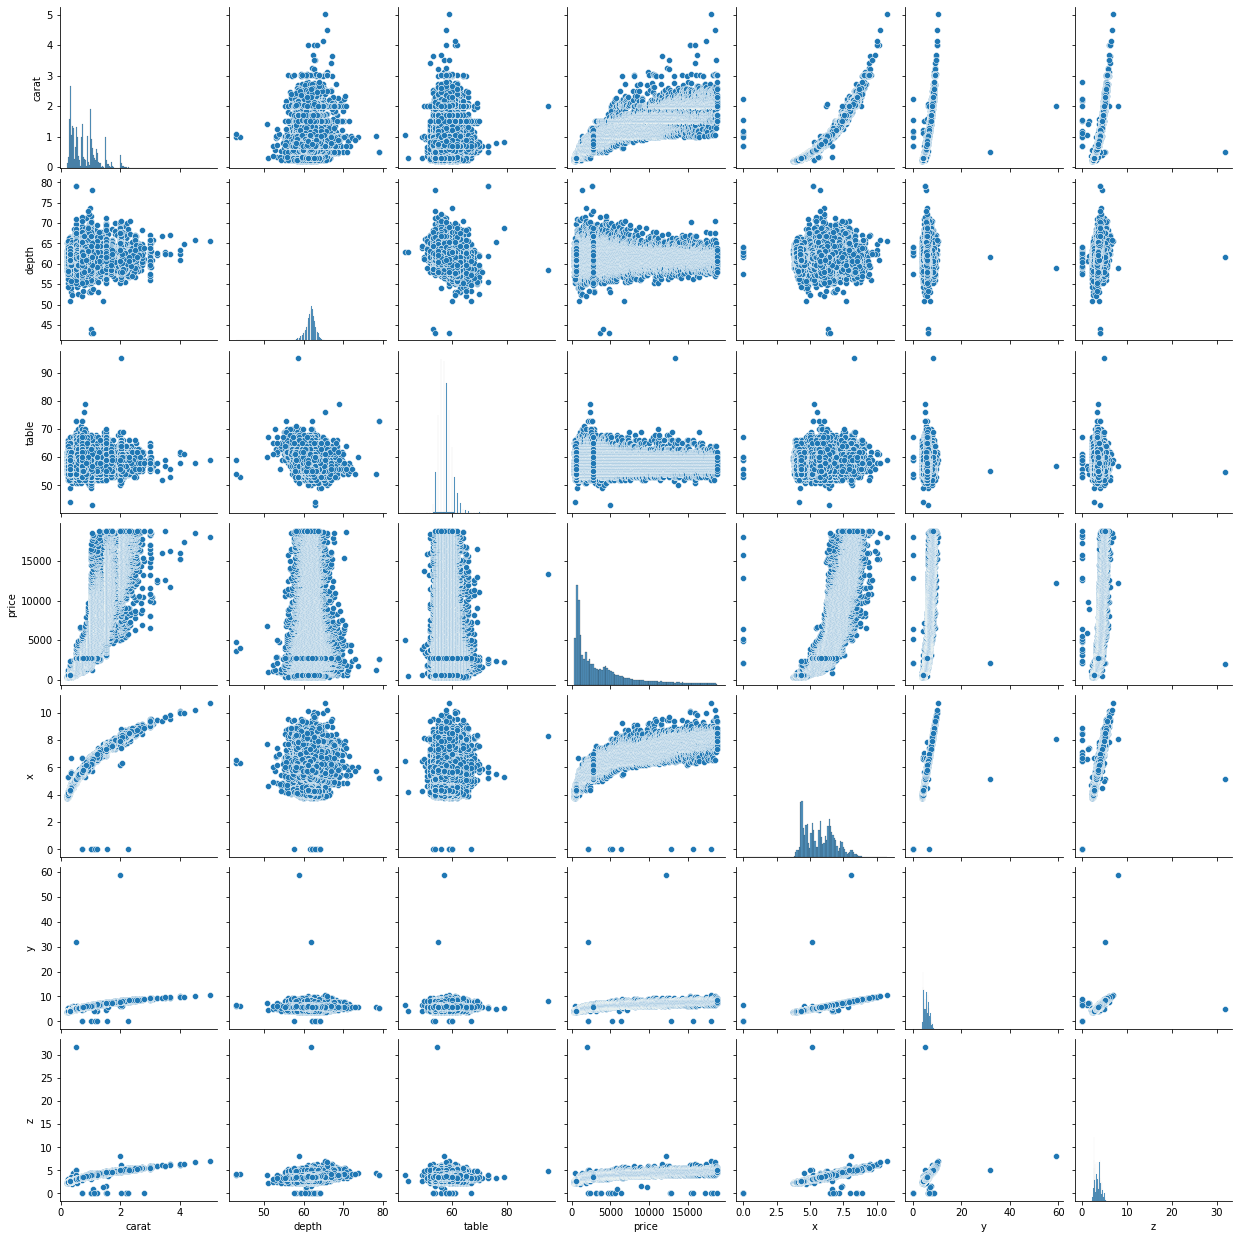

In [ ]:
sns.pairplot(data=dim)
plt.show()

3-join plot

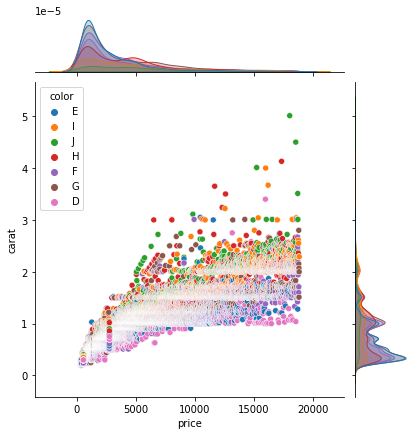

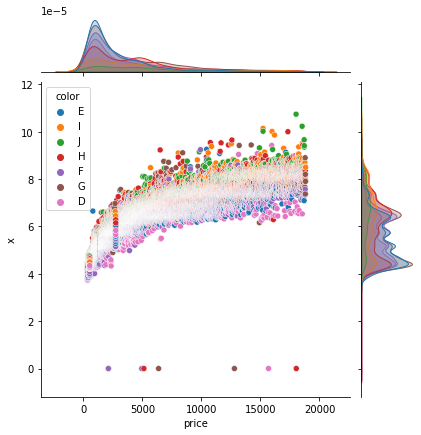

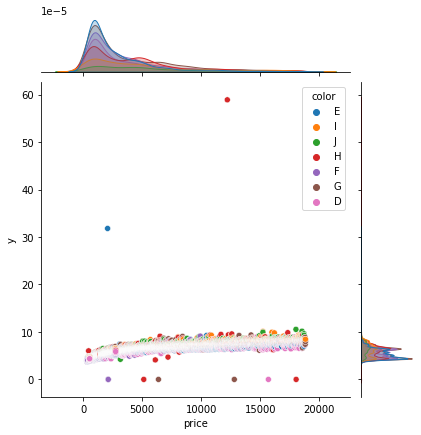

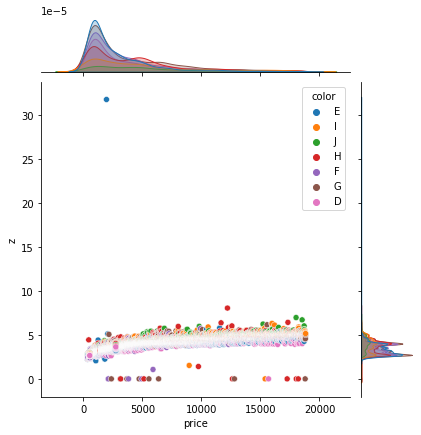

In [ ]:
sns.jointplot(data=dim,y='carat',x='price',hue='color')
plt.show()
sns.jointplot(data=dim,y='x',x='price',hue='color')
plt.show()
sns.jointplot(data=dim,y='y',x='price',hue='color')
plt.show()
sns.jointplot(data=dim,y='z',x='price',hue='color')
plt.show()

4-histplot 

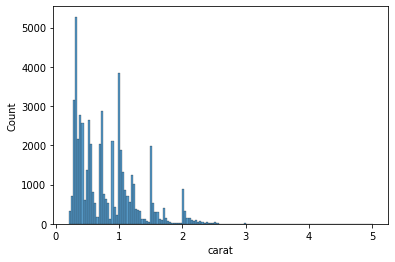

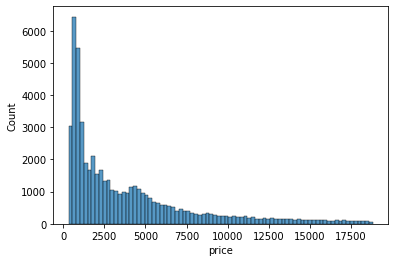

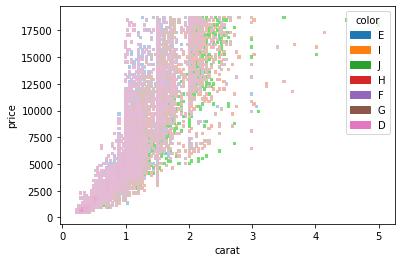

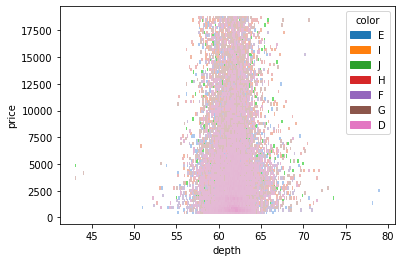

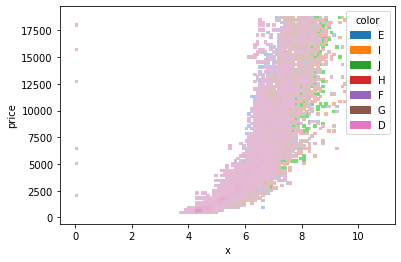

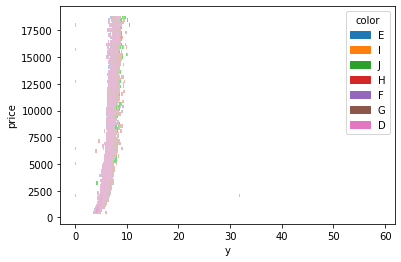

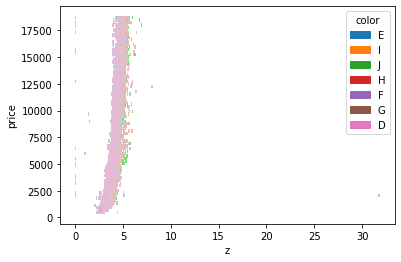

In [ ]:
sns.histplot(data=dim,x='carat')
plt.show()
sns.histplot(data=dim,x='price')
plt.show()
sns.histplot(data=dim,x='carat',y='price',hue='color')
plt.show()
sns.histplot(data=dim,x='depth',y='price',hue='color')
plt.show()

sns.histplot(data=dim,x='x',y='price',hue='color')
plt.show()
sns.histplot(data=dim,x='y',y='price',hue='color')
plt.show()
sns.histplot(data=dim,x='z',y='price',hue='color')
plt.show()

5-heatmap

In [9]:
corr=dim.corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


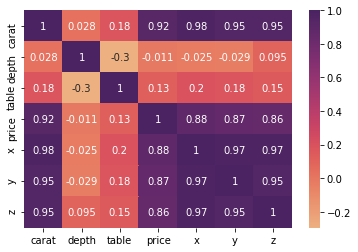

In [10]:
sns.heatmap(dim.corr(),annot=True,cmap='flare')
plt.show()

6-box plot

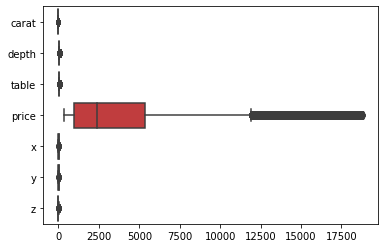

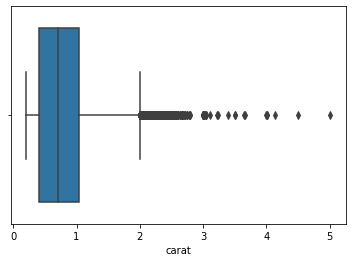

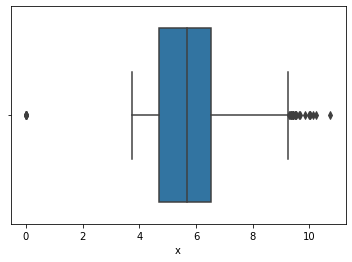

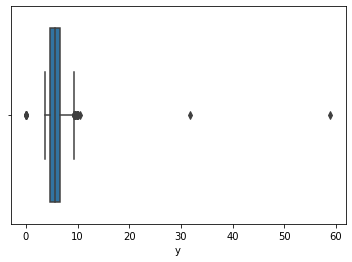

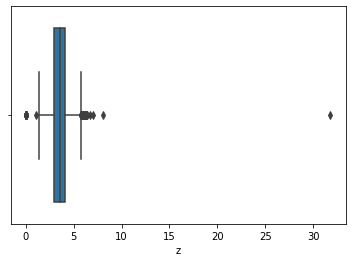

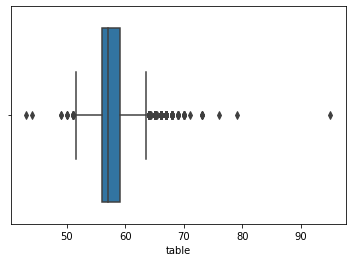

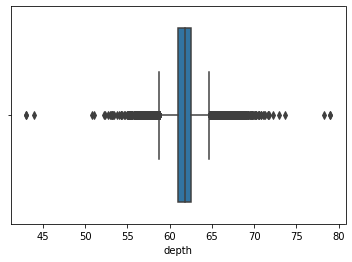

In [ ]:
sns.boxplot(data=dim,orient="h")
plt.show()
sns.boxplot(x="carat",data=dim,orient="h")
plt.show()
sns.boxplot(x="x",data=dim,orient="h")
plt.show()
sns.boxplot(x="y",data=dim,orient="h")
plt.show()
sns.boxplot(x="z",data=dim,orient="h")
plt.show()
sns.boxplot(x="table",data=dim,orient="h")
plt.show()
sns.boxplot(x="depth",data=dim,orient="h")
plt.show()

In [8]:
dim.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
dim.depth.value_counts()

62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
52.2       1
71.2       1
72.9       1
53.1       1
53.0       1
Name: depth, Length: 184, dtype: int64

In [10]:
dim.price.value_counts()

605      132
802      127
625      126
828      125
776      124
        ... 
6118       1
13075      1
15122      1
17149      1
8686       1
Name: price, Length: 11602, dtype: int64

In [11]:
dim.carat.value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.11       1
3.50       1
3.67       1
5.01       1
3.51       1
Name: carat, Length: 273, dtype: int64

In [12]:
dim.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

#**outliers**


In [11]:
Q1 = dim['depth'].quantile(0.25)
Q3 = dim['depth'].quantile(0.75)
IQR = Q3 - Q1
idx = ~((dim['depth'] < (Q1 - 1.5 * IQR)) | (dim['depth'] > (Q3 + 1.5 * IQR)))
dim[idx] # Clean Dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


#**Onehotencoding for Categorical variables**




In [12]:
cat_cols = dim.select_dtypes(include='object').columns.to_list() # OHE using Pandas
dim1=pd.get_dummies(dim[idx], columns=cat_cols, drop_first=True)

In [13]:
dim1

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


#**#Using OrdinalEncoder to transform categorical values**

In [ ]:
#from sklearn.preprocessing import OrdinalEncoder
#enc = OrdinalEncoder()
#dim[["cut", "color","clarity"]] = enc.fit_transform(dim[["cut", "color","clarity"]])
##dim[array(['Fair','Good', 'Very Good', 'Premium', 'Ideal'], dtype=object),array(['G','E','F','H','D','I','J'], dtype=object),array(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], dtype=object)]

In [ ]:
#dim

In [ ]:
#dim.clarity.value_counts()

#**Train data & test data**

In [14]:
from sklearn.model_selection import train_test_split

X=dim1.drop('price', axis=1)
y=dim1['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
45211,0.51,62.5,59.0,5.06,5.11,3.18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
20050,0.31,61.2,60.0,4.37,4.39,2.68,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
39940,0.23,61.3,61.0,3.94,3.99,2.43,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
48621,0.70,63.6,54.0,5.67,5.62,3.59,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
47790,0.71,61.9,58.0,5.66,5.69,3.51,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12112,1.01,62.2,55.0,6.44,6.46,4.01,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
46859,0.53,61.5,55.0,5.19,5.22,3.20,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
39996,0.41,61.8,56.0,4.79,4.76,2.95,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
941,0.72,62.7,55.0,5.64,5.69,3.55,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


#**Standardization**

In [15]:
from sklearn.preprocessing import StandardScaler
#creating Polynomial features as there is some degree of variation in the linear relationship
#scaler = PolynomialFeatures(degree=2, interaction_only=True)

scaler = StandardScaler()
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_train.mean(axis = 0)#Verify that the mean of each feature (column) is 0:

array([-7.44592538e-17, -3.21656076e-15,  8.08090283e-16, -2.06984875e-16,
        2.72358915e-16,  1.70249010e-16, -3.75258839e-17,  9.59872608e-17,
       -3.47608187e-17,  1.10602605e-17,  4.70061072e-17, -6.15226991e-17,
        4.74011165e-17,  3.08107257e-17, -2.21205210e-17,  2.02442268e-17,
        2.72556420e-17, -8.01868887e-17,  5.61900735e-17,  5.62888258e-17,
       -5.66838351e-17,  1.89604466e-17, -1.12577652e-17])

# 1- Select and Train a Model





pipline 

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#index for all col
carat_ix,depth_ix, table_ix, price_ix,x_ix,y_ix,z_ix = [
    list(dim1.columns).index(col)
    for col in ("carat", "depth", "table", "price","x","y","z")]


#class CombinedAttributesAdder(BaseEstimator, TransformerMixin): 

#LinearRegression model

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
pred=lin_reg.predict(X_test)
pred
#LinearRegression(copy_X=True ,fit_intercept=True, n_jobs=None, normalize=False)

array([ -687.94525737,  -226.33513616,  2364.37368369, ...,
       13600.10302563,  6249.5765882 ,  4013.71890791])

In [28]:
lin_reg.score(X_test,y_test)

0.922338300725859

#**decision tree**

In [17]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_predict = tree_reg.predict(X_test)

#**Calculating scores for Decision Tree using CrossValidation**

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_test, y_test, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)
print ("Scores: ", tree_rmse_scores)
print ("Mean: ", tree_rmse_scores.mean())
print ("Standard Deviation: ", tree_rmse_scores.std())
from sklearn.metrics import r2_score
print("R^2 error: ", r2_score(y_test, tree_predict))

Scores:  [ 967.27365631  989.70167982  897.73313253  878.34225637  976.44361159
  915.00228794  901.61132131  909.54429946  988.56953098 1031.93234195]
Mean:  945.6154118266683
Standard Deviation:  48.63307913286531
R^2 error:  0.9505192631769469


#**random forest**

In [20]:
from sklearn.ensemble import RandomForestRegressor
rand_for=RandomForestRegressor()
rand_for.fit(X_train,y_train)
scores = cross_val_score(rand_for, X_test, y_test, scoring = "neg_mean_squared_error", cv = 10)
rand_for_scores = np.sqrt(-scores)
print ("Scores: ", rand_for_scores)
print ("Mean: ", rand_for_scores.mean())
print ("Standard Deviation: ", rand_for_scores.std())

Scores:  [715.40820933 773.53610611 721.74515283 657.84115207 674.93194531
 691.84398928 680.01943003 656.04603789 712.45928654 808.26238155]
Mean:  709.2093690944246
Standard Deviation:  46.84991576840181


In [21]:
rand_for.score(X_test,y_test)

0.9724497201135206

In [23]:
predicted_train=rand_for.predict(X_train)
predicted_test=rand_for.predict(X_test)

In [24]:
predicted_test

array([  586.82,   593.34,  1819.22, ..., 17657.04,  6438.9 ,  4139.48])

In [25]:
predicted_train

array([1641.93,  637.06,  492.59, ..., 1105.25, 2792.48, 6706.99])

#**RMES/MES**

In [29]:
#call RMSE model & MSE
from sklearn.metrics import mean_squared_error
MSE1=lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, MSE1)
print(lin_mse)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1203444.3952017655


1097.016132607796

In [32]:
MSE2=rand_for.predict(X_test)
lin_mse1 = mean_squared_error(y_test, MSE2)
print(lin_mse1)
lin_rmse1 = np.sqrt(lin_mse1)
lin_rmse1

431012.71382476715


656.5155853631863

#**Save every model you experiment with using the joblib library**

In [ ]:
# CODE HERE
import joblib
joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")

# Hyperparametrization

#**We start with Random Search to find ideal hyperparameters to use with GridSearch for Random Forest Regression.**

In [33]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# These are the most important hyperparameters for Random Forest Regression.
rf_random = RandomizedSearchCV(estimator = rand_for, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [43]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 308.2552 degrees.
Accuracy = 91.08%.
Model Performance
Average Error: 306.5834 degrees.
Accuracy = 91.12%.


#Grid Search

In [44]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [49]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110,120],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [1, 2, 3,4],
    'n_estimators': [600, 700, 800, 900, 1000, 1500]
}
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


C:\Users\Abdullah Shwaiky\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.96677606 0.96691752 0.96686833 0.96692956 0.96700079 0.96688186
 0.96656496 0.96662915 0.96656597 0.96655806 0.9665071  0.9665597
 0.96607458 0.96608402 0.96606353 0.96618614 0.96618236 0.96619329
        nan        nan        nan        nan        nan        nan
 0.9626987  0.9628769  0.96281569 0.96280599 0.96285877 0.96288629
 0.96269632 0.96268108 0.96283698 0.96275572 0.96277384 0.96275188
 0.96272066 0.96267171 0.96274999 0.96271148 0.96277547 0.96274481
        nan        nan        nan        nan        nan        nan
 0.95956533 0.95976135 0.95966923 0.95971997 0.95971224 0.95971719
 0.95972914 0.95965593 0.95965861 0.95980889 0.95971355 0.95978936
 0.95972415 0.95959492 0.95960196 0.95969716 0.95971986 0.95974222
        nan        nan        nan        na

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [80, 90, 100, 110, 120],
                         'max_features': [2, 3],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [600, 700, 800, 900, 1000, 1500]},
             verbose=2)

In [51]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test) # Best estimator was the Random Search Estimator.

Model Performance
Average Error: 343.7876 degrees.
Accuracy = 90.59%.


In [52]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 306.5834 degrees.
Accuracy = 91.12%.
